Working with Time Series
=======

Date and Time in Python
----

In [1]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

In [5]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [10]:
import pandas as pd

date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

Time Series Indexing
====

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [14]:
data['2014-07-04' : '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [15]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Time Series data structures
-----

In [16]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [17]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [18]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [19]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2015-07-03', periods = 8, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
pd.date_range('2015-07-03', periods = 8, freq = 'M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [24]:
pd.timedelta_range(0, periods = 10, freq = 'H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Frequencies and Offsets
----------

In [25]:
pd.timedelta_range(0, periods = 9, freq = "2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [26]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods = 5, freq = BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

Example : Visualization of a number of bycles in Seattle
--------------

In [52]:
data = pd.read_csv('Fremont_Bridge.csv', encoding = 'utf-8', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [53]:
data.columns = ['East', 'West']
data['Total'] = data['East'] + data['West']
data.dropna().describe()

,East,West,Total
count,51807.000000,51807.000000,51807.000000
mean,57.614666,53.733820,111.348486
std,83.327468,69.988632,140.091927
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,61.000000
75%,70.000000,71.000000,146.000000
max,717.000000,698.000000,957.000000


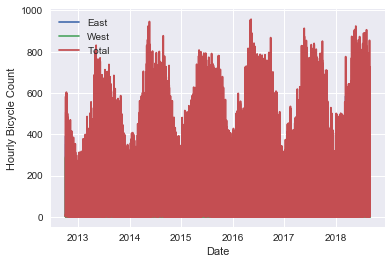

In [54]:
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0,0.5,'Weekly bicycle count')

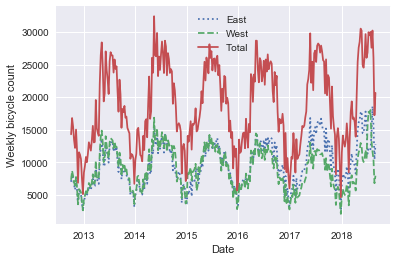

In [55]:
weekly = data.resample('W').sum()
weekly.plot(style = [':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0,0.5,'mean hourly count')

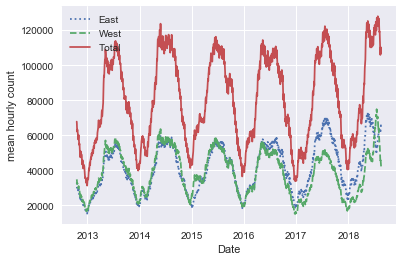

In [56]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style = [':', '--', '-'])
plt.ylabel('mean hourly count')

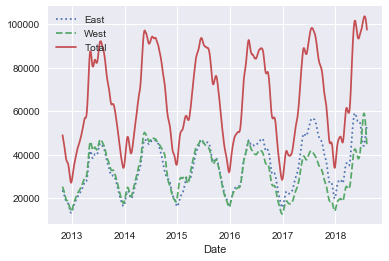

In [57]:
daily.rolling(50, center = True, win_type = 'gaussian').sum(std = 10).plot(style = [':', '--', '-'])

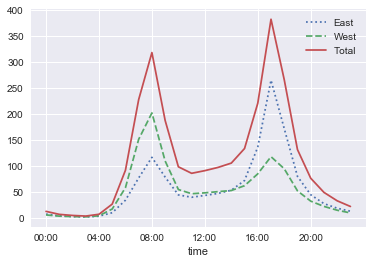

In [58]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])

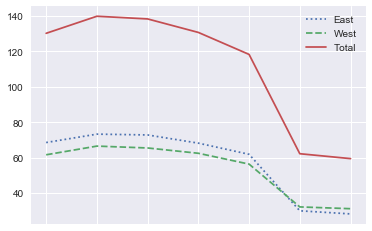

In [59]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style = [':', '--', '-'])

In [60]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

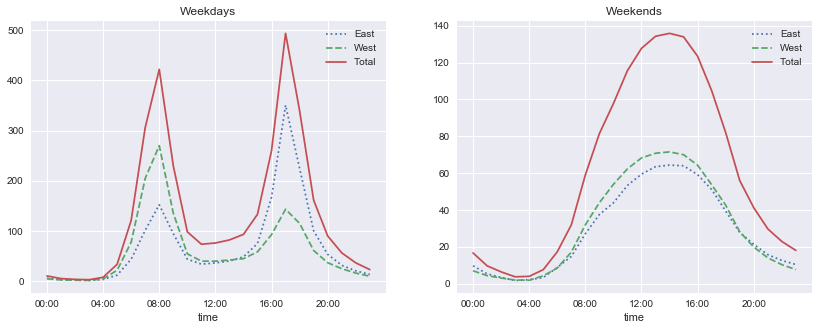

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.loc['Weekday'].plot(ax = ax[0], title = 'Weekdays',
                          xticks = hourly_ticks, style = [':', '--', '-'])
by_time.loc['Weekend'].plot(ax = ax[1], title = 'Weekends',
                          xticks = hourly_ticks, style = [':', '--', '-']);